In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/GitHub/dynamics-simulation-16-715/lecture-notebooks/Lecture 14/Project.toml`


In [2]:
using LinearAlgebra
using OrdinaryDiffEq
using Plots
using ForwardDiff

In [3]:
#Pendulum Parameters
ℓ = 1.0
m = 1.0
g = 9.81

9.81

In [4]:
function fθ(x,p,t)
    θ = x[1]
    θ̇ = x[2]
    
    θ̈ = -g*sin(θ)/ℓ
    
    ẋ = [θ̇; θ̈]
end

fθ (generic function with 1 method)

In [5]:
#initial conditions
θ0 = pi/2
x0_θ = [θ0; 0]

2-element Vector{Float64}:
 1.5707963267948966
 0.0

In [6]:
#Simulate
tspan = (0.0,10.0)
prob = ODEProblem(fθ,x0_θ,tspan)
sol_θ = solve(prob,Tsit5());
#sol_θ = solve(prob,Tsit5(),abstol=1e-6,reltol=1e-6);

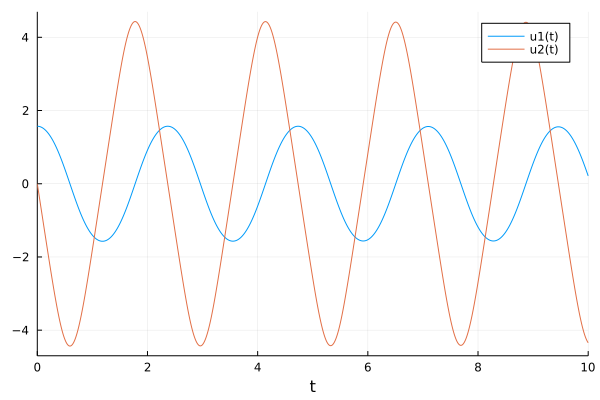

In [7]:
plot(sol_θ)

In [8]:
function f(x,p,t)
    q = x[1:2]
    v = x[3:4]
    
    M = m*I(2)
    G = [0.0; m*g]
    J = dcdq(q)
    d = 2*v'*v
    
    z = [M J'; J 0]\[-G; -d]
    
    v̇ = z[1:2]
    
    ẋ = [v; v̇]
end

function constraint(q)
    return q[1]^2 + q[2]^2 - ℓ^2
end

function dcdq(q)
    return [2*q[1]; 2*q[2]]'
end

dcdq (generic function with 1 method)

In [9]:
#initial conditions
q0 = [1.0; 0]
x0 = [q0; 0; 0]

4-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0

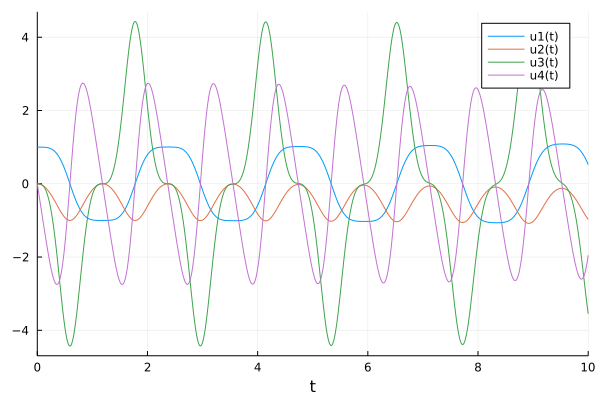

In [10]:
#Simulate
tspan = (0.0,10.0)
prob = ODEProblem(f,x0,tspan)
sol = solve(prob,Tsit5());
#sol = solve(prob,Tsit5(),abstol=1e-6,reltol=1e-6);
plot(sol)

In [11]:
#Calculate angle
N = 1000
t = LinRange(tspan[1],tspan[2],N)
θ = zeros(N)
for k = 1:N
    θ[k] = atan(sol(t[k])[1],-sol(t[k])[2])
end

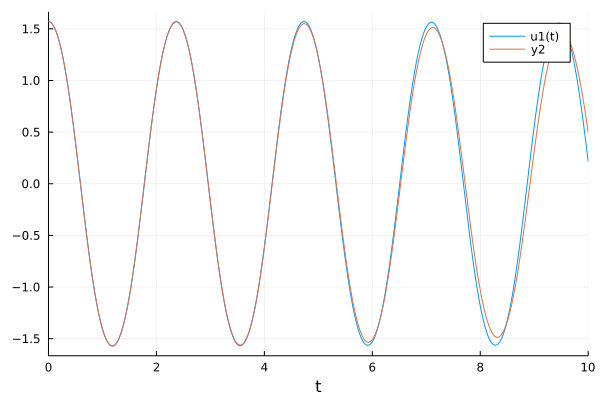

In [12]:
plot(sol_θ,vars=(0,1))
plot!(t,θ)

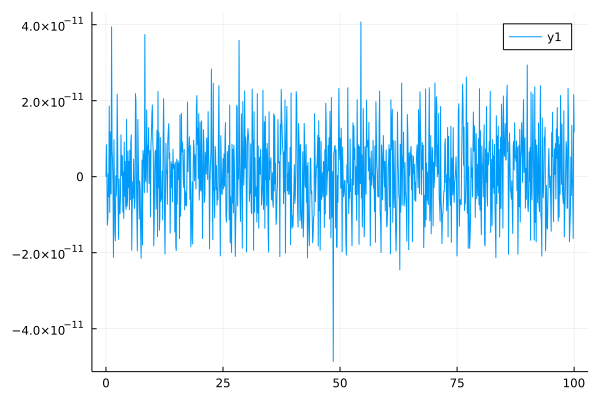

In [38]:
#Calculate constraint violation
N = 1000
t = LinRange(tspan[1],tspan[2],N)
c_error = zeros(N)
for k = 1:N
    c_error[k] = constraint(sol(t[k])[1:2])
end

plot(t,c_error)

In [36]:
function f2(x,p,t)
    q = x[1:2]
    v = x[3:4]
    
    α = 10000.0
    β = 100.0
    
    M = m*I(2)
    G = [0.0; m*g]
    J = dcdq(q)
    
    c = constraint(q)
    ċ = J*v
    d = 2*v'*v
    
    λ = (J*(M\J'))\(J*(M\G) - d)

    v̇ = M\(-G + J'*(λ - α*c - β*ċ))
    
    ẋ = [v; v̇]
end

f2 (generic function with 1 method)

In [37]:
#Simulate
tspan = (0.0,100.0)
prob = ODEProblem(f2,x0,tspan)
#sol = solve(prob,Tsit5());
sol = solve(prob,Tsit5(),abstol=1e-8,reltol=1e-8);
plot(sol)

In [ ]:
function f3(x,p,t)
    q = x[1:2]
    v = x[3:4]
    
    α = 10.0
    β = 3.0
    
    M = m*I(2)
    G = [0.0; m*g]
    J = dcdq(q)
    
    c = constraint(q)
    ċ = J*v
    d = 2*v'*v
    e = J*(M\(J'*(α*c + β*ċ)))
    
    z = [M J'; J 0]\[-G; -(d+e)]
    
    v̇ = z[1:2]
    
    ẋ = [v; v̇]
end